# *Mid - Term Examination Machine Learning* : Sport Car Price Prediction Using XGBOOST Model
Dataset ini berisi informasi mengenai harga berbagai mobil sport dari berbagai produsen. Kumpulan data tersebut mencakup merek dan model mobil, tahun produksi, ukuran mesin, tenaga kuda, torsi, waktu 0-60 MPH, dan harga dalam USD. Kumpulan data ini berguna untuk menganalisis harga berbagai mobil sport dan mengidentifikasi tren di pasar.

**Columns**
1. Merek Mobil: Merek mobil sport yang mewakili merek atau perusahaan yang memproduksi mobil tersebut. Contoh merek mobil dalam kumpulan data ini antara lain Porsche, Lamborghini, Ferrari, Audi, dan McLaren.
2. Model Mobil: Model mobil sport, yang mewakili versi atau varian tertentu dari mobil yang diproduksi oleh pabrikan. Contoh model mobil dalam dataset ini antara lain 911, Huracan, 488 GTB, R8, 720S, M8, AMG GT, Corvette, Mustang Shelby GT500, dan GT-R Nismo.
3. Tahun: Tahun produksi mobil sport, yang menunjukkan tahun model saat mobil tersebut pertama kali diperkenalkan atau tersedia untuk dibeli.
4. Ukuran Mesin (L): Ukuran mesin mobil sport dalam liter, yang mewakili volume silinder mesin. Ukuran mesin yang lebih besar biasanya menunjukkan tenaga dan kinerja yang lebih tinggi. Ukuran mesin dalam kumpulan data ini berkisar dari 2,0L hingga 8,0L, dan beberapa mobil menggunakan motor listrik sebagai gantinya.
5. Tenaga Kuda: Tenaga kuda mobil sport, yang mewakili keluaran tenaga mesin mobil. Tenaga kuda yang lebih tinggi biasanya menunjukkan akselerasi yang lebih cepat dan kecepatan tertinggi yang lebih tinggi. Nilai horsepower dalam kumpulan data ini berkisar antara 300 hingga 1479.
6. Torsi (lb-ft): Torsi mobil sport dalam pound-feet, yang mewakili gaya rotasi yang dihasilkan oleh mesin. Nilai torsi yang lebih tinggi biasanya menunjukkan akselerasi yang lebih kuat dan penanganan yang lebih baik. Nilai torsi dalam kumpulan data ini berkisar antara 270 hingga 1180.
7. 0-60 MPH Time (detik): Waktu yang dibutuhkan mobil sport untuk berakselerasi dari 0 hingga 60 mil per jam, yang merupakan ukuran umum akselerasi dan performa. Waktu 0-60 MPH yang lebih rendah biasanya menunjukkan akselerasi yang lebih cepat dan kinerja yang lebih baik. Waktu 0-60 MPH dalam kumpulan data ini berkisar antara 1,85 hingga 5,3 detik.
8. Harga (dalam USD): Harga mobil sport dalam dolar AS, yang mewakili biaya pembelian mobil. Harga dalam kumpulan data ini berkisar dari $25.000 hingga $3.000.000.

In [ ]:
# Mid-Term Examination Machine Learning
# Name : Naufal raihan ramadhan
# NIM  : 1103200157

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb

import math

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Sport car price.csv')
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [ ]:
df.shape

(1007, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [ ]:
# Checking the percentage of missing values across all the columns
null = pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage Null Values':df.isnull().sum()*100/len(df)})
null

,Null Values,Percentage Null Values
Car Make,0,0.000000
Car Model,0,0.000000
Year,0,0.000000
Engine Size (L),10,0.993049
Horsepower,0,0.000000
Torque (lb-ft),3,0.297915
0-60 MPH Time (seconds),0,0.000000
Price (in USD),0,0.000000


# Data Preparing
1. Untuk kolom 'Harga', kami hanya akan mengganti ',' dengan nol dan mengonversi tipe menjadi integer.
Untuk kolom 'Ukuran Mesin (L)', pada data asli terdapat semua data kategorikal dan berisi data seperti 'Listrik' atau 'Motor Listrik', dll. Sulit untuk menganalisis dengan kolom yang berisi data numerik dan kategorikal . Jadi kita akan membuat kolom baru 'Ukuran Mesin Cat' dengan kategori 'Kecil', 'Sedang', 'Besar', 'Ekstra Besar', aturannya seperti di bawah ini:
'Kecil' --> '0'-'2'
'Sedang' --> '2'-'4'
'Besar'--> '4'-'6'
'Ekstra Besar'-->'6'-'8'
dan jenis Ukuran Mesin lainnya, kita akan mengambil nilai yang sama pada kolom 'Ukuran Mesin (L)'

Untuk kolom 'Horsepower', kami tidak akan mengganti ',' dan '+' dan mengonversi tipenya menjadi integer.
Untuk kolom 'Torsi (lb-ft)', kami akan mengganti ',', '-' dan '+' dengan nol dan mengonversi tipenya menjadi integer.
Untuk kolom 'Waktu 0-60 MPH (detik)', kami akan mengganti '< 1.9' dengan '1.0' dan mengonversi tipe menjadi float.

In [ ]:
df.describe()

,Car Make,Car Model,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Engine Size Cat,Car Age
count,994.000000,994.000000,994.000000,994.000000,994.000000,9.940000e+02,994.000000,994.000000
mean,15.059356,87.463783,632.870221,554.883300,3.529547,3.755965e+05,12.730382,1.804829
std,8.638627,48.064546,415.759566,437.401535,0.767991,7.307884e+05,2.375552,2.031508
min,0.000000,0.000000,181.000000,151.000000,1.000000,2.500000e+04,0.000000,0.000000
25%,8.000000,52.000000,454.000000,406.000000,2.900000,7.180000e+04,12.000000,1.000000
50%,13.000000,86.000000,591.000000,509.000000,3.500000,1.346500e+05,14.000000,2.000000
75%,22.000000,123.000000,671.000000,603.000000,4.000000,2.495000e+05,14.000000,2.000000
max,37.000000,175.000000,10000.000000,10000.000000,6.500000,5.200000e+06,14.000000,58.000000


Dari angka statistik di atas, kita dapat melihat beberapa outlier pada kolom 'Torsi (lb-ft)', sehingga kita akan mengecualikan data yang 'Torsi (lb-ft)' sama dengan 0.

# Univariate Analysis

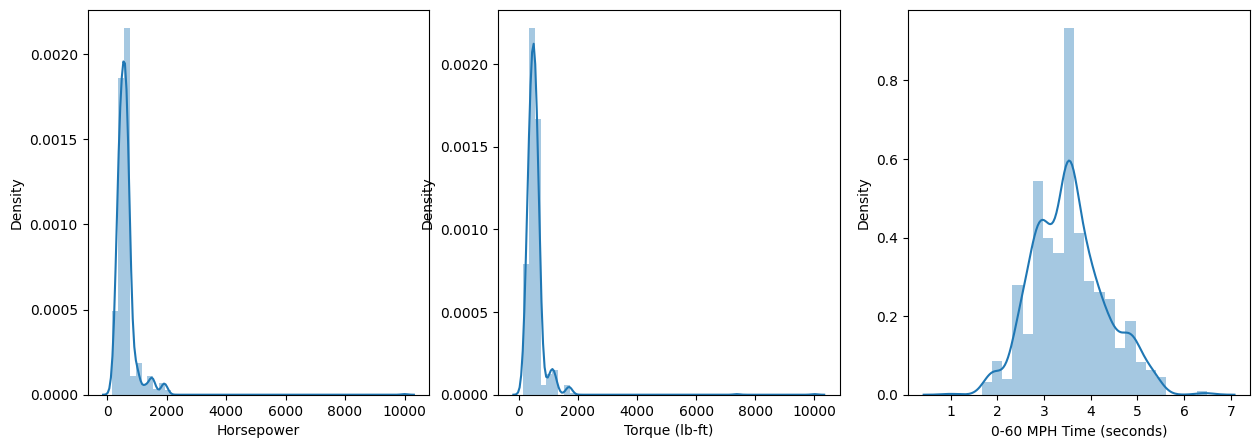

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df['Horsepower'])

plt.subplot(1,3,2)
sns.distplot(df['Torque (lb-ft)'])

plt.subplot(1,3,3)
sns.distplot(df['0-60 MPH Time (seconds)'])
plt.show()

# Bivariate Analysis

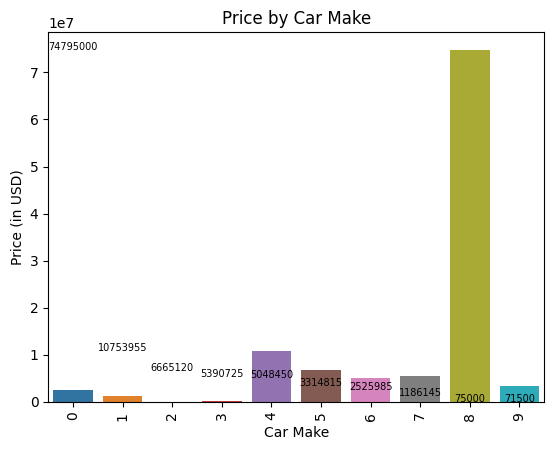

In [ ]:
car_make_sum = df.groupby('Car Make')['Price (in USD)'].sum().reset_index().head(10).sort_values('Price (in USD)',ascending=False).reset_index(drop=True)
g = sns.barplot(data=car_make_sum,x='Car Make',y='Price (in USD)')
for v in car_make_sum.itertuples():
    #print(v._2)
    g.text(x=v.Index,y=v._2,s=str(round(v._2, 2)), size=7, ha="center")
plt.title('Price by Car Make')
plt.xticks(rotation=90)
plt.show()

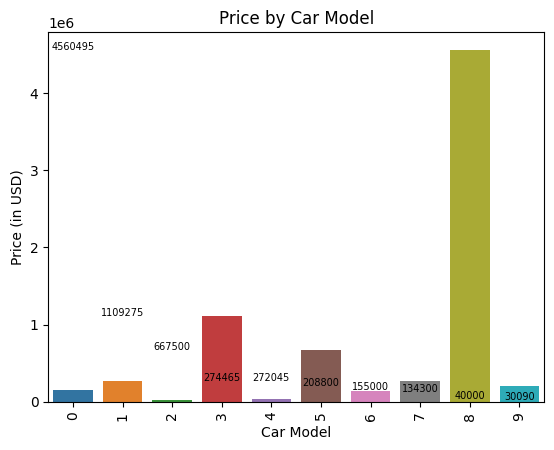

In [ ]:
car_model_sum = df.groupby('Car Model')['Price (in USD)'].sum().reset_index().head(10).sort_values('Price (in USD)',ascending=False).reset_index(drop=True)
g = sns.barplot(data=car_model_sum,x='Car Model',y='Price (in USD)')
for v in car_model_sum.itertuples():
    #print(v._2)
    g.text(x=v.Index,y=v._2,s=str(round(v._2, 2)), size=7, ha="center")
plt.title('Price by Car Model')
plt.xticks(rotation=90)
plt.show()

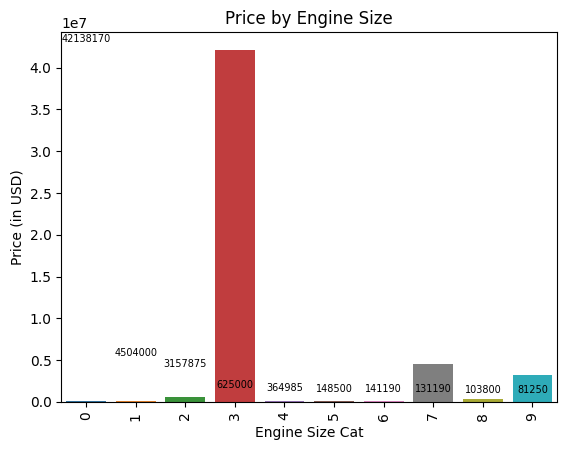

In [ ]:
engine_sum = df.groupby('Engine Size Cat')['Price (in USD)'].sum().reset_index().head(10).sort_values('Price (in USD)',ascending=False).reset_index(drop=True)
g = sns.barplot(data=engine_sum,x='Engine Size Cat',y='Price (in USD)')
for v in engine_sum.itertuples():
    #print(v._2)
    g.text(x=v.Index,y=v._2+1e6,s=str(round(v._2, 2)), size=7, ha="center")
plt.title('Price by Engine Size')
plt.xticks(rotation=90)
plt.show()

Untuk kolom 'Horsepower', akan mengurutkan nilai dalam urutan menaik, lalu membuat rentang berbeda untuk mengubahnya menjadi variabel kategori untuk dianalisis.

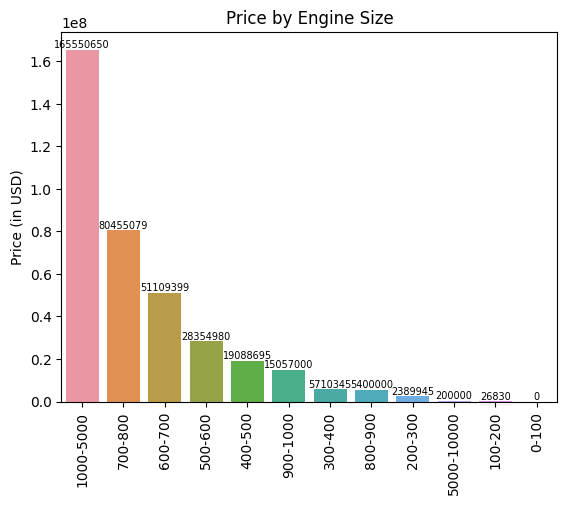

In [ ]:
# Memeriksa jumlah Horsepower unik dalam urutan menaik
np.array(sorted(df.Horsepower.unique()))

# Mengelompokkan Horsepower di seluruh rentang untuk mengubahnya menjadi variabel kategori
df['Horsepower_bucket'] = pd.cut(df['Horsepower'],[0,100,200,300,400,500,600,700,800,900,1000,5000,10000],labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000','1000-5000','5000-10000'])

# plot value
horsepower_bucket = df.groupby('Horsepower_bucket')['Price (in USD)'].sum().reset_index().sort_values('Price (in USD)',ascending=False,ignore_index=True)
g = sns.barplot(data=horsepower_bucket,x=horsepower_bucket.index,y='Price (in USD)')
for v in horsepower_bucket.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+1e6,s=str(v._2), size=7, ha="center")
plt.title('Price by HorsePower')
plt.xticks(ticks=horsepower_bucket.index,labels=horsepower_bucket['Horsepower_bucket'].values,rotation=90)
plt.show()

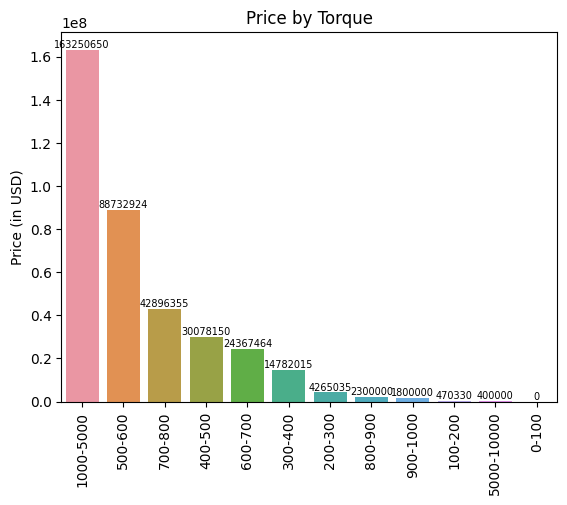

In [ ]:
# Checking the number of unique Horsepower in ascending order
np.array(sorted(df['Torque (lb-ft)'].unique()))

# Bucketing the Horsepower across ranges to convert it to a categorical variable
df['Torque_bucket'] = pd.cut(df['Torque (lb-ft)'],[0,100,200,300,400,500,600,700,800,900,1000,5000,10000],labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000','1000-5000','5000-10000'])

# plot value
torque_bucket = df.groupby('Torque_bucket')['Price (in USD)'].sum().reset_index().sort_values('Price (in USD)',ascending=False,ignore_index=True)
g = sns.barplot(data=torque_bucket,x=torque_bucket.index,y='Price (in USD)')
for v in torque_bucket.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+1e6,s=str(v._2), size=7, ha="center")
plt.title('Price by Torque')
plt.xticks(ticks=torque_bucket.index,labels=torque_bucket['Torque_bucket'].values,rotation=90)
plt.show()

# Model Building

In [ ]:
# Membuat objek XGBRegressor dengan parameter default
xgb_reg = xgb.XGBRegressor(n_jobs = -1) # default paramters
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
# Menyesuaikan model XGBRegression pada dataset kereta
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Memprediksi kumpulan data pengujian
y_pred_test = xgb_reg.predict(X_test)
r2score = round(r2_score(y_pred_test,y_test),2)*100

In [ ]:
# Menghitung skor R2 pada dataset pengujian
print("R2 Score on Test Data is : ",r2score)

R2 Score on Test Data is :  94.0


In [ ]:
# Menghitung Mean Squared Error dan Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
rmse = round(math.sqrt(mse),2)
print(rmse)

212646.27


# Random Search for Xgboost Regression

In [ ]:
# Melakukan RandomizedSearchCV untuk penyetelan hyperparameter
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=folds, verbose=3, random_state=42)

# Fitting on the validation set
random_search.fit(X_val, y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=3)

In [ ]:
# Mencetak skor terbaik yang bisa kita peroleh dengan menggunakan parameter
print('We can get score of :',random_search.best_score_,' using',random_search.best_params_)

We can get score of : 0.6959580002265253  using {'subsample': 1.0, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [ ]:
# Membuat model XGBRegression dengan hyperparameter yang dipilih
xgb_reg_hpt = xgb.XGBRegressor(subsample=0.6, n_estimators=750, min_child_weight=1,max_depth=12,
                               learning_rate=0.25, gamma=1, colsample_bytree=0.6, n_jobs = -1)
xgb_reg_hpt.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.6,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 1,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.25,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 12,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 750,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.6,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
# Mencetak skor R2 pada kumpulan data pengujian
print("R2 score on Test Data is : ",r2score)

R2 score on Test Data is :  97.0


In [ ]:
# Menghitung Mean Squared Error dan Root Mean Squared Error dari set pengujian
mse = mean_squared_error(y_test, y_pred_test_hpt)
rmse = round(math.sqrt(mse),2)
print(rmse)

151667.2


# Prediction and Model evaluation

In [ ]:
# Calculating R2 score
y_train_pred = xgb_reg_hpt.predict(X_train)
y_test_pred = xgb_reg_hpt.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 score on Training data : ",round(r2_train_lr,2)*100)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 score on Test data : ",round(r2_test_lr,2)*100)

R2 score on Training data :  100.0
R2 score on Test data :  97.0


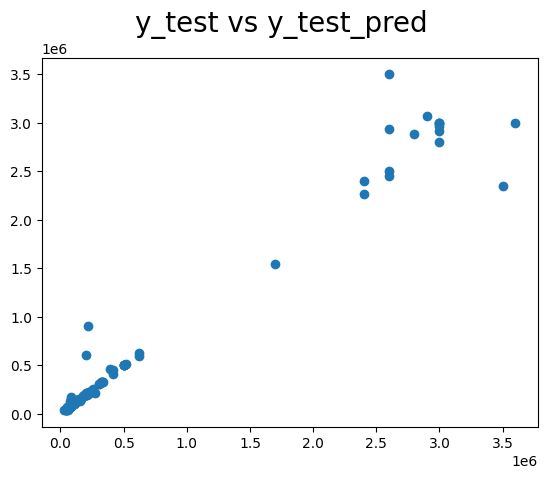

In [ ]:
# Merencanakan plot sebar dari nilai aktual dan prediksi dari set pengujian
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.scatter(y_test,y_test_pred)

In [ ]:
# Mengurutkan kerangka data yang dibuat yang berisi nama fitur dan nilai koefisien yang sesuai dalam urutan menurun
# untuk mendapatkan koefisien tertinggi
lm_model_df.sort_values(by='Coef',ascending=False).reset_index(drop=True)

,Feaure,Coef
0,Horsepower,0.419137
1,Torque (lb-ft),0.346437
2,0-60 MPH Time (seconds),0.066026
3,Car Model,0.065530
4,Car Make,0.048333
5,Engine Size Cat,0.037700
6,Car Age,0.016838
